### Importing Packages and Load Data

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./placement.csv")

In [5]:
data.shape

(1000, 3)

In [4]:
data.sample(5)

,cgpa,placement_exam_marks,placed
702,6.24,39.0,0
317,7.47,19.0,0
213,6.62,19.0,1
756,7.41,30.0,1
448,6.32,31.0,0


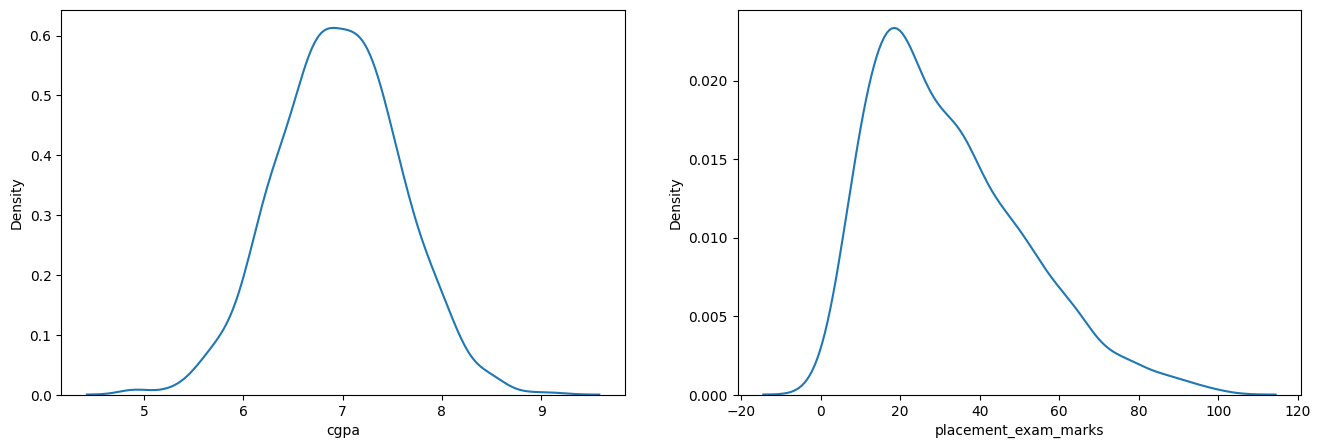

In [12]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.kdeplot(data=data['cgpa'])

plt.subplot(1,2,2)
sns.kdeplot(data=data['placement_exam_marks'])

plt.show()

In [ ]:
data['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [15]:
data['cgpa'].skew()

np.float64(-0.014529938929314918)

In [ ]:
print("Mean of CGPA", data['cgpa'].mean())
print("STD of CGPA", data['cgpa'].std())
print("Min value of CGPA", data['cgpa'].min())
print("Max value of CGPA", data['cgpa'].max())

Mean of CGPA 6.96124
STD of CGPA 0.6158978751323896
Min value of CGPA 4.89
Max value of CGPA 9.12


In [17]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

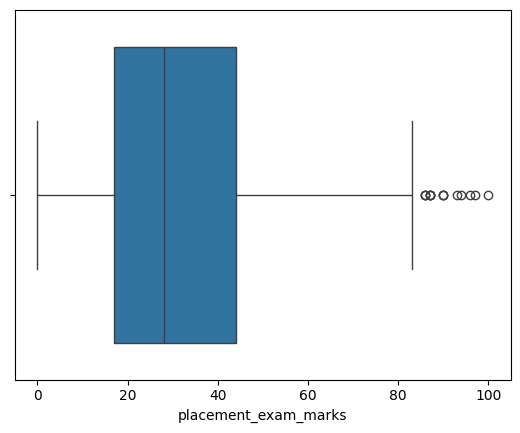

In [23]:
sns.boxplot(data['placement_exam_marks'], orient='h')

In [24]:
# Finding the IQR
percentile25 = data['placement_exam_marks'].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)

In [25]:
iqr = percentile75 - percentile25

In [26]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [27]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding Outliers

In [28]:
data[data['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [29]:
data[data['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [31]:
new_data = data[data['placement_exam_marks'] < upper_limit]

In [32]:
new_data.shape

(985, 3)

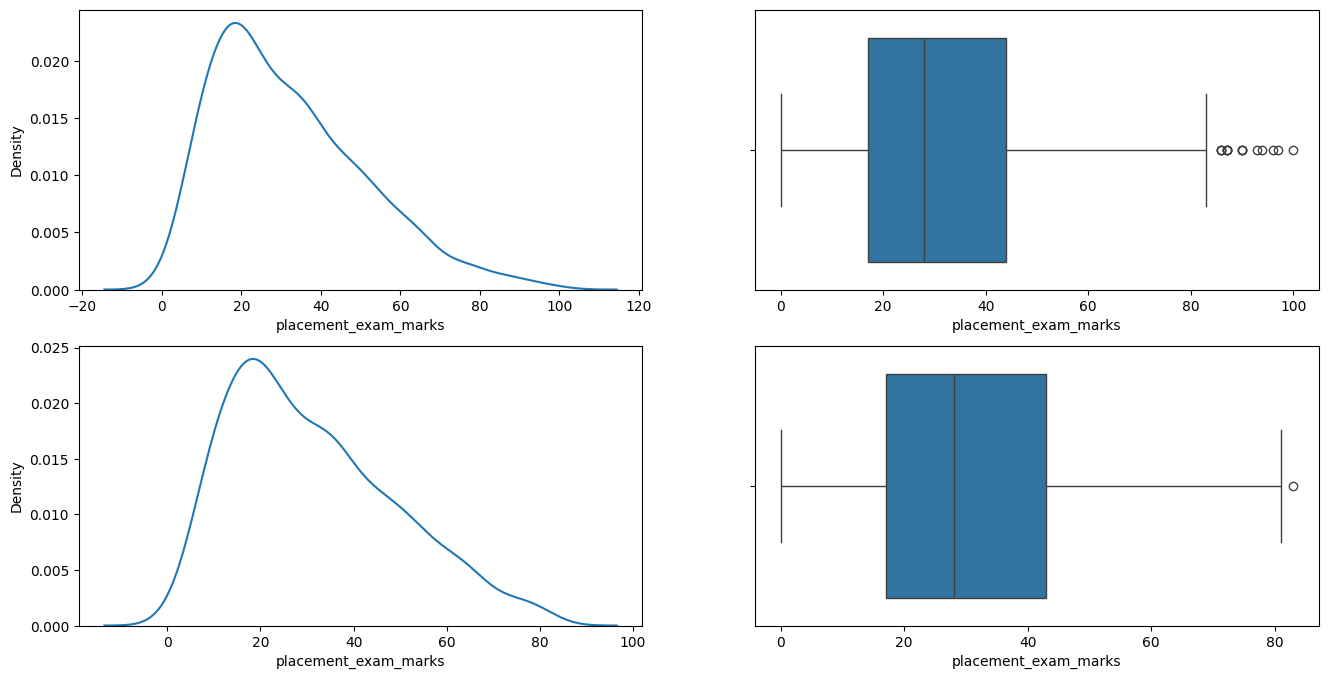

In [35]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.kdeplot(new_data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['placement_exam_marks'],orient='h' )

plt.show()

### Capping

In [39]:
new_data_cap = data.copy()

new_data_cap['placement_exam_marks'] = np.where(
    new_data_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_data_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_data_cap['placement_exam_marks']
    )
)

In [42]:
new_data_cap.shape

(1000, 3)

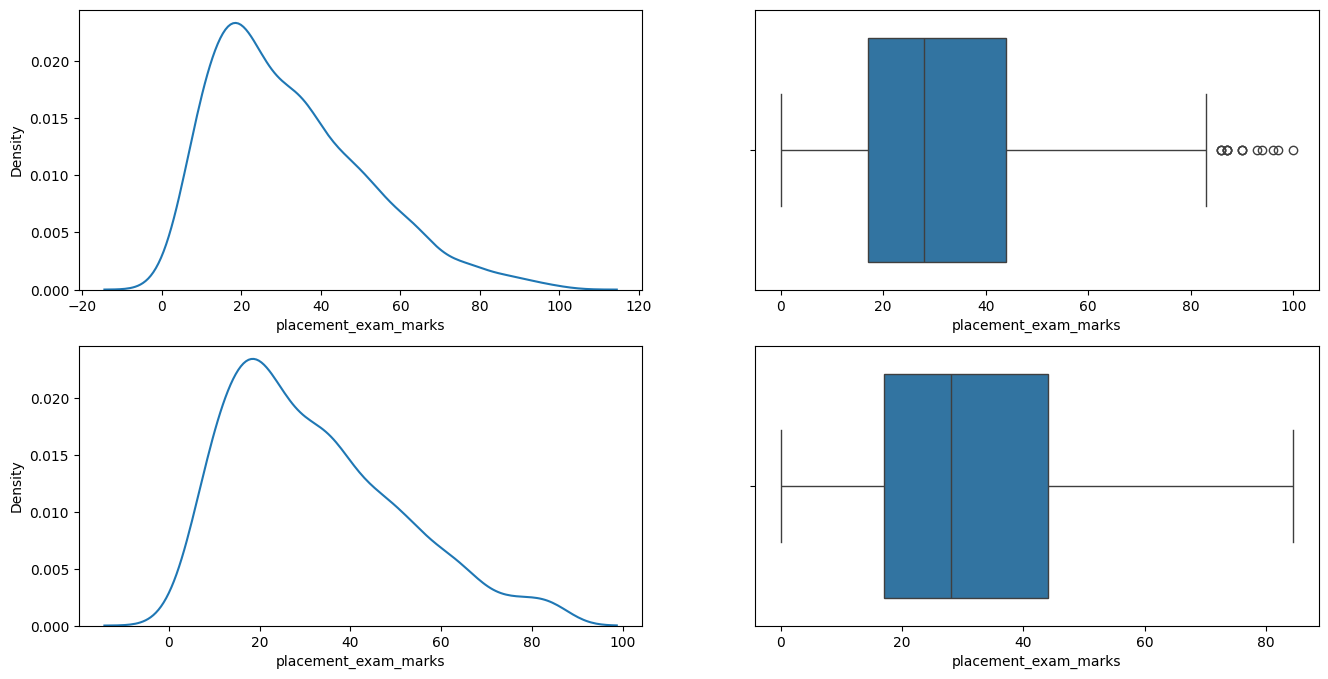

In [41]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.kdeplot(new_data_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data_cap['placement_exam_marks'],orient='h' )

plt.show()